## Jada Macharie
## Assignment 6

In [3]:
import geopandas as gpd
import matplotlib as plt
import plotly.express as px
import os

In [4]:
os.getcwd()
os.chdir('/Users/jadamacharie/Downloads/Maryland')
os.getcwd()

'/Users/jadamacharie/Downloads/Maryland'

In [23]:
#Import Maryland corectional facilitates as a geopandas dataframe
geo_correctfac= gpd.read_file("./Maryland_Correctional_Facilities_-_Local_Correctional_Facilities.geojson", driver ="GeoJson")
geo_correctfac
geo_correctfac.head()

#Import Maryland shapefile including all zipcaodes 
#Mar_zipcodes = gpd.read_file("zip://Geographic data_ Zip Codes (Shape File).zip")
#Mar_zipcodes
#Mar_zipcodes.head()

#Import Maryland counties shapefile
#Mar_count_shapefile = gpd.read_file("zip://tl_2016_24_cousub.zip")
#Mar_count_shapefile 
# Mar_count_shapefile .head()

,OBJECTID,Address,City,State,Zip_Code,Type,Agency_Name,County,geometry
0,1,14300 McMullen Highway SW,Cumberland,MD,21502.0,Detention Center,Allegany County Detention Center,Allegany,POINT (-78.82320 39.59897)
1,2,131 Jennifer Road,Annapolis,MD,21401.0,Detention Center,Anne Arundel County Detention Center,Anne Arundel,POINT (-76.53004 38.98890)
2,3,720 Bosley Avenue,Towson,MD,21204.0,Detention Center,Baltimore County Department of Corrections,Baltimore,POINT (-76.60925 39.40740)
3,4,325 Stafford Road,Prince Frederick,MD,20678.0,Detention Center,Calvert County Detention Center,Calvert,POINT (-76.61672 38.53710)
4,5,101 Gay Street,Denton,MD,21629.0,Detention Center,Caroline County Detention Center,Caroline,POINT (-75.83353 38.88777)


In [24]:
#Make sure all dataframes are a geodataframe
print(type(geo_correctfac))
print(type(Mar_zipcodes))
print(type(Mar_zipcodes.geometry))
print(type(Mar_count_shapefile))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'geopandas.geodataframe.GeoDataFrame'>


In [25]:
#Columns for Maryland correctional facilities
for col in geo_correctfac.columns:
    print(col)
    
#geo_correctfac.dtypes

OBJECTID
Address
City
State
Zip_Code
Type
Agency_Name
County
geometry


In [26]:
Mar_zipcodes.geometry.type

0          Polygon
1     MultiPolygon
2          Polygon
3          Polygon
4          Polygon
          ...     
92         Polygon
93         Polygon
94         Polygon
95         Polygon
96         Polygon
Length: 97, dtype: object

In [27]:
#Export all three into a single geopackage file
geo_correctfac.to_file("Maryland.gpkg", layer='counties', driver="GPKG")
Mar_zipcodes.to_file("Maryland.gpkg",layer='counties', driver="GPKG")
Mar_count_shapefile.to_file("Maryland.gpkg",layer='counties', driver="GPKG")

/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<Axes: >

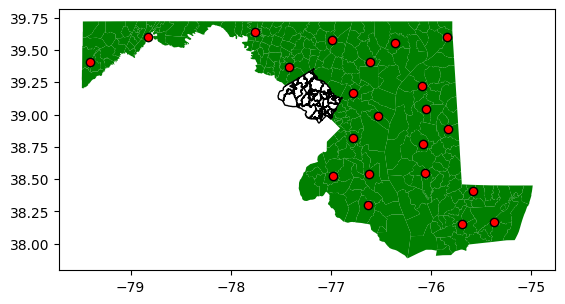

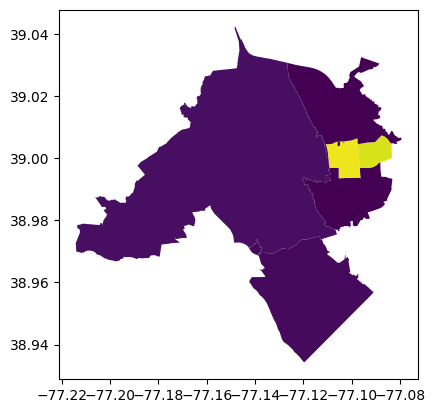

In [28]:
#Plot the geodataframes
#Mar_count_shapefile.plot(color='green')
j =Mar_count_shapefile.plot(color='green')

#geo_correctfac.plot(color='red', edgecolor='black')
k=geo_correctfac.plot(ax=j, color='red', edgecolor='black')
#geo_correctfac.plot.title("Correctional Facilities in Maryland")

#Mar_zipcodes.plot('zipcode')
Mar_zipcodes.plot('zipcode',color='white',edgecolor='black',ax=k)

#Mar_count_shapefile.boundary.plot();
Mar_zipcodes.query('mail_city == "BETHESDA"').plot(column="zipcode")
#Mar_zipcodes.query('mail_city == "BETHESDA"').to_crs(4326).explore();


In [38]:
#Interactive Maps of the Geodataframe
#Maryland
Mar_count_shapefile.explore()
#All zipcodes in Maryland
Mar_zipcodes.explore(column='zipcode',cmap='Set2')
#Mailing areas in each zipcode in Maryland
Mar_zipcodes.explore(column='mail_city',cmap='Set2')


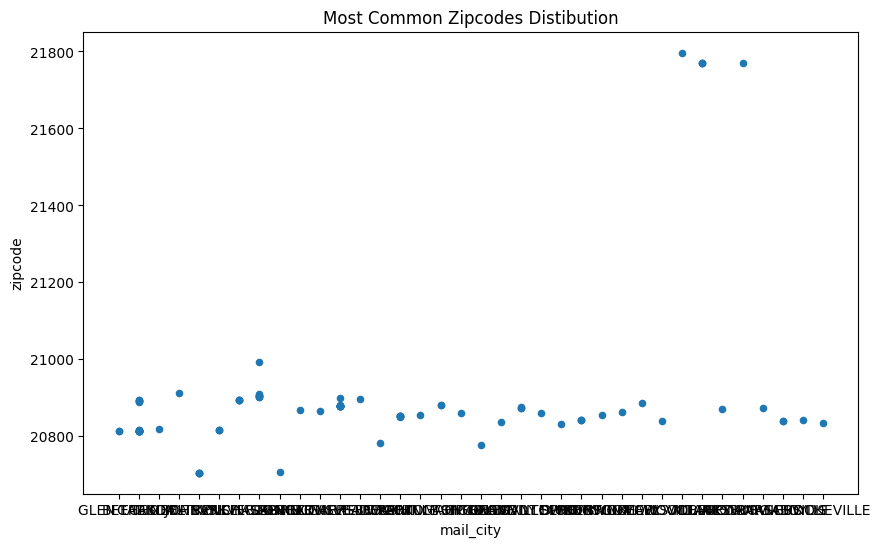

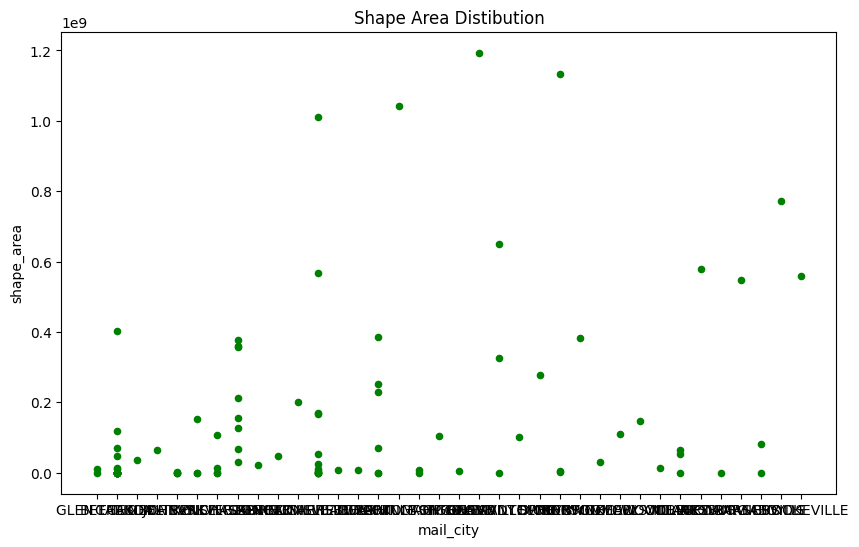

In [29]:
#Visualize the data in the geodataframes
# x= Mar_zipcodes['mail_city']
# y= Mar_zipcodes['zipcode']
Mar_zipcodes.plot.scatter(x='mail_city',y='zipcode',title= 'Most Common Zipcodes Distibution',figsize=(10, 6))
Mar_zipcodes.plot.scatter(x='mail_city',y='shape_area',color= 'green',title= 'Shape Area Distibution',figsize=(10, 6))
spacing = 0.100
#Mar_zipcodes.subplots_adjust(bottom=spacing)
#Mar_zipcodes.xticks(rotation =90)
